In [5]:
import pandas as pd

In [7]:
df=pd.read_csv(r'C:\Users\tugba\Desktop\DataScience\perrin-freres-monthly-champagne-.csv')

In [9]:
df.shape

(107, 2)

In [13]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [15]:
df.columns=['Month','Sales']

In [17]:
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [19]:
df.shape

(107, 2)

In [21]:
df.isnull().sum()

Month    1
Sales    2
dtype: int64

In [23]:
df.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [25]:
df.drop(106, axis=0, inplace=True)

In [27]:
df.drop(105, axis=0, inplace=True)

In [29]:
df.isnull().sum()

Month    0
Sales    0
dtype: int64

In [31]:
df.dtypes

Month     object
Sales    float64
dtype: object

In [33]:
df['Month']=pd.to_datetime(df['Month'])

In [35]:
df.dtypes

Month    datetime64[ns]
Sales           float64
dtype: object

In [37]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [39]:
df.set_index('Month', inplace=True)

In [41]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [43]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<Axes: xlabel='Month'>

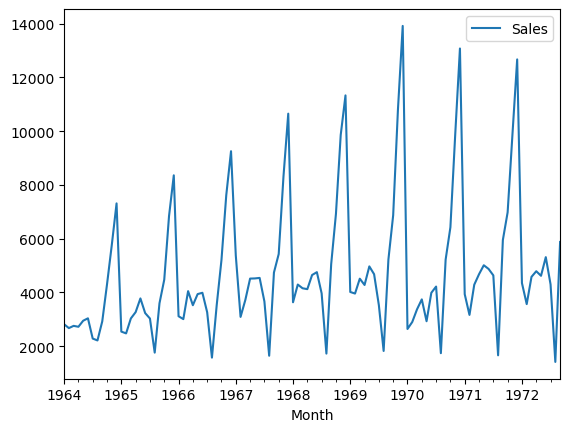

In [45]:
df.plot()

In [47]:
## adfuller test p-value < 0.05

In [51]:
!pip install statsmodels

In [53]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
## hypothesis testing

In [55]:
adfuller(df['Sales'])

(-1.833593056327623,
 0.363915771660245,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [63]:
def adfuller_test(sales):
    result= adfuller(sales)
    labels=['ADF test statistics','p-value','Lags used', 'Number of obs used']
    for value,label in zip(result,labels):
        print('{} : {} '.format(label,value))
    if result[1] <= 0.05:
        print('Strong evidence against null hypo, reject the null hypo & data is stationary')
    else:
        print('Weak evidence against null hypo, accept the null hypo & data is non stationary')

In [65]:
adfuller_test(df['Sales'])

ADF test statistics : -1.833593056327623 
p-value : 0.363915771660245 
Lags used : 11 
Number of obs used : 93 
Weak evidence against null hypo, accept the null hypo & data is non stationary


In [61]:
## data must be stationary

In [67]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [69]:
df

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [73]:
df['Sales first diff.']=df['Sales']- df['Sales'].shift(1)

In [75]:
df.head()

,Sales,Sales first diff.
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [79]:
df['Seasonal first diff.']=df['Sales']- df['Sales'].shift(12)

In [81]:
df.head()

,Sales,Sales first diff.,Seasonal first diff.
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN


In [85]:
adfuller_test(df['Seasonal first diff.'].dropna())

ADF test statistics : -7.626619157213163 
p-value : 2.060579696813685e-11 
Lags used : 0 
Number of obs used : 92 
Strong evidence against null hypo, reject the null hypo & data is stationary


<Axes: xlabel='Month'>

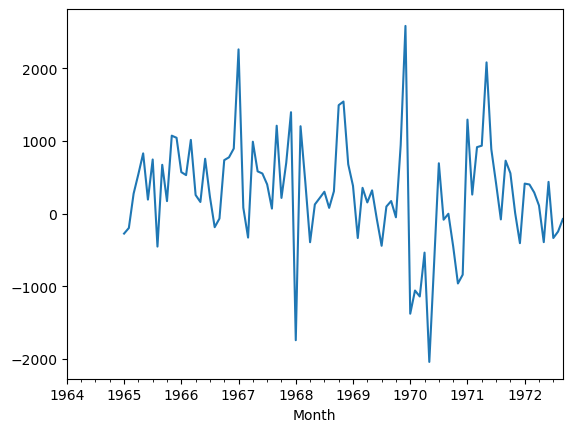

In [87]:
df['Seasonal first diff.'].plot()

In [93]:
## ARIMA AR + I + MA
## (p,d,q)
## p - pacf graph
## d=1
## q - acf graph

In [95]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [97]:
import matplotlib.pyplot as plt

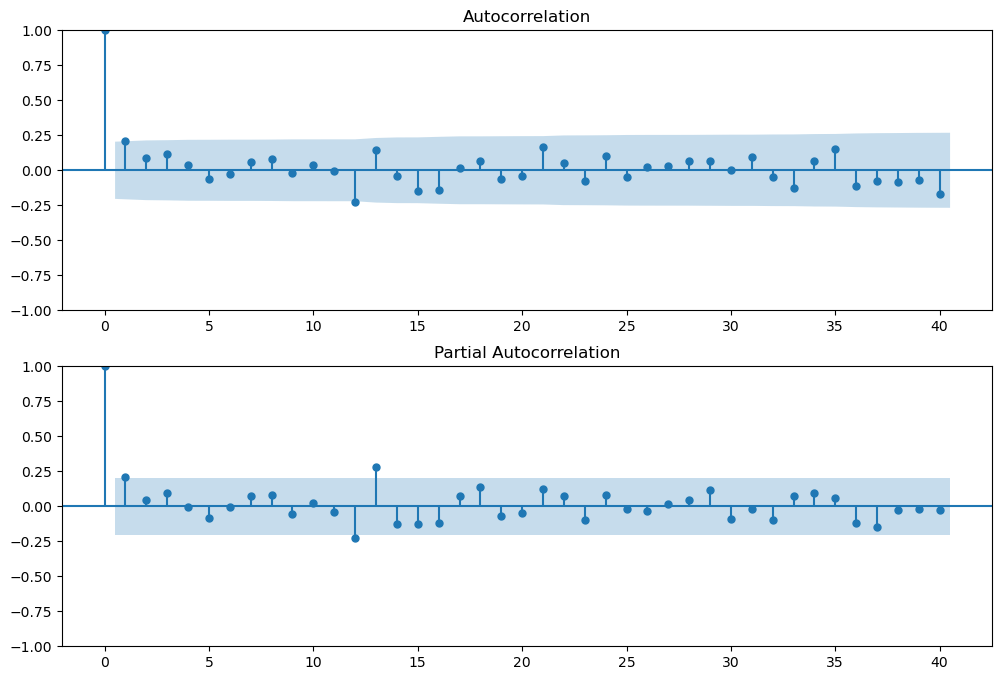

In [101]:
fig=plt.figure(figsize=(12,8))
ax1= fig.add_subplot(211)
fig=plot_acf(df['Seasonal first diff.'].iloc[13:],lags=40, ax=ax1)

ax2=fig.add_subplot(212)
fig= plot_pacf(df['Seasonal first diff.'].iloc[13:],lags=40, ax=ax2)

In [103]:
### p d q 

In [109]:
from statsmodels.tsa.arima.model import ARIMA

In [111]:
model= ARIMA(df['Sales'],order=(1,1,1))

C:\Users\tugba\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tugba\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tugba\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [113]:
model=model.fit()

In [115]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Wed, 17 Jul 2024   AIC                           1911.627
Time:                        13:25:44   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.316      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [117]:
df.shape

(105, 3)

In [119]:
df['forecast']=model.predict(start=90,end=103, dynamic=True)

In [123]:
df.tail(20)

,Sales,Sales first diff.,Seasonal first diff.,forecast
Month,,,,
1971-02-01,3162.0,-772.0,263.0,NaN
1971-03-01,4286.0,1124.0,916.0,NaN
1971-04-01,4676.0,390.0,936.0,NaN
1971-05-01,5010.0,334.0,2083.0,NaN
1971-06-01,4874.0,-136.0,888.0,NaN
1971-07-01,4633.0,-241.0,416.0,4977.053232
1971-08-01,1659.0,-2974.0,-79.0,5023.890466
1971-09-01,5951.0,4292.0,730.0,5045.177780
1971-10-01,6981.0,1030.0,557.0,5054.852769


<Axes: xlabel='Month'>

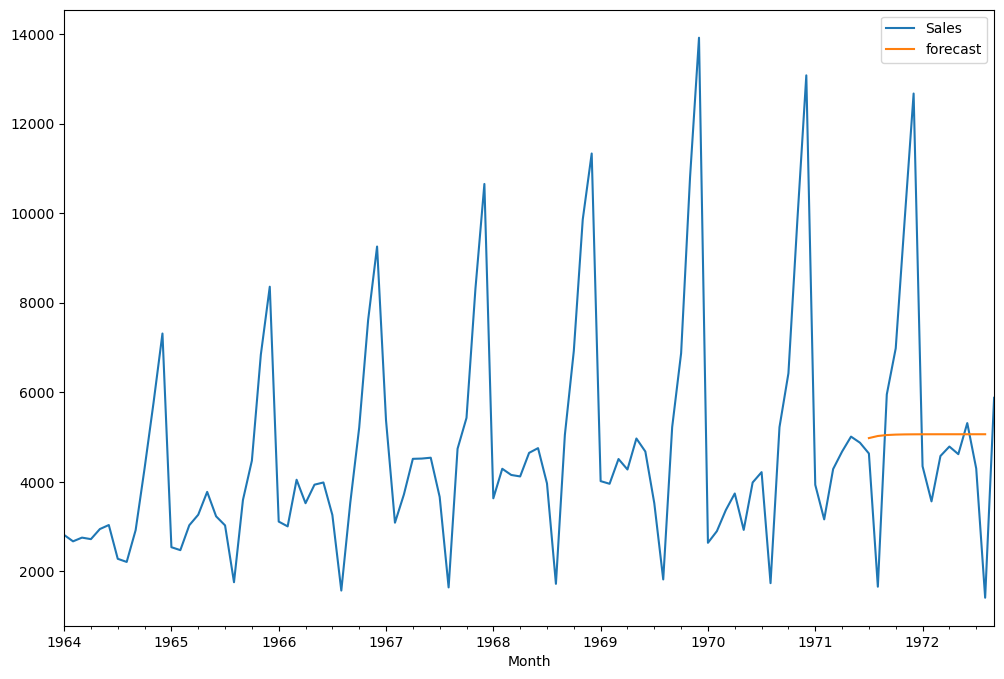

In [125]:
df[['Sales','forecast']].plot(figsize=(12,8))

In [127]:
## In seasonal datas ARIMA won't work precisely we need to use SARIMAX

In [131]:
import statsmodels.api as sm

In [135]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))

C:\Users\tugba\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tugba\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [137]:
results=model.fit()

In [139]:
df['forecast_SARIMAX']=results.predict(start=90,end=103, dynamic=True)

In [141]:
df.tail(20)

,Sales,Sales first diff.,Seasonal first diff.,forecast,forecast_SARIMAX
Month,,,,,
1971-02-01,3162.0,-772.0,263.0,NaN,NaN
1971-03-01,4286.0,1124.0,916.0,NaN,NaN
1971-04-01,4676.0,390.0,936.0,NaN,NaN
1971-05-01,5010.0,334.0,2083.0,NaN,NaN
1971-06-01,4874.0,-136.0,888.0,NaN,NaN
1971-07-01,4633.0,-241.0,416.0,4977.053232,4437.323943
1971-08-01,1659.0,-2974.0,-79.0,5023.890466,2050.747390
1971-09-01,5951.0,4292.0,730.0,5045.177780,5493.376330
1971-10-01,6981.0,1030.0,557.0,5054.852769,6752.039201


<Axes: xlabel='Month'>

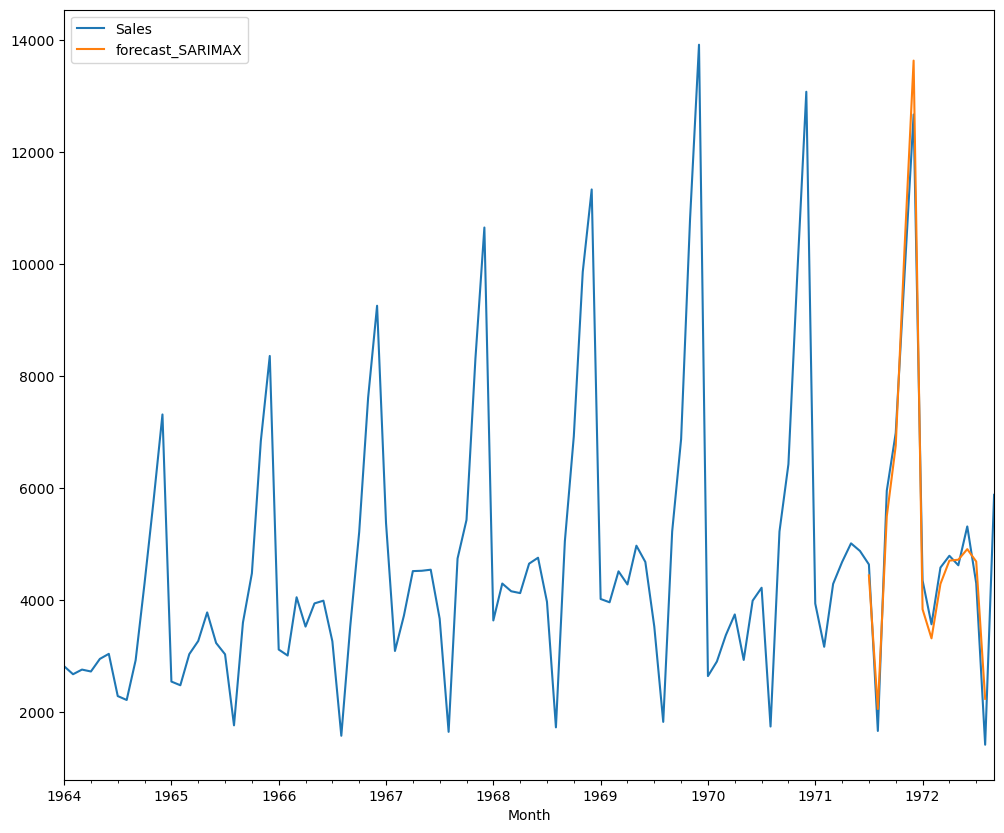

In [143]:
df[['Sales','forecast_SARIMAX']].plot(figsize=(12,10))

In [145]:
## dataoffset Let's create some additional data 

In [147]:
from pandas.tseries.offsets import DateOffset

In [149]:
DateOffset()

<DateOffset>

In [151]:
df.index[-1]

Timestamp('1972-09-01 00:00:00')

In [155]:
future_dates=[df.index[-1]+ DateOffset (months=x) for x in range (0,24)]

In [157]:
future_dataset=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [159]:
future_dataset.tail()

,Sales,Sales first diff.,Seasonal first diff.,forecast,forecast_SARIMAX
1974-04-01,NaN,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN,NaN


In [161]:
future_df = pd.concat([df,future_dataset])

C:\Users\tugba\AppData\Local\Temp\ipykernel_4600\3142971550.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df = pd.concat([df,future_dataset])


In [163]:
future_df.shape


(128, 5)

In [165]:
future_df['forecast_SARIMAX2']=results.predict(start=104,end=124, dynamic=True)

<Axes: >

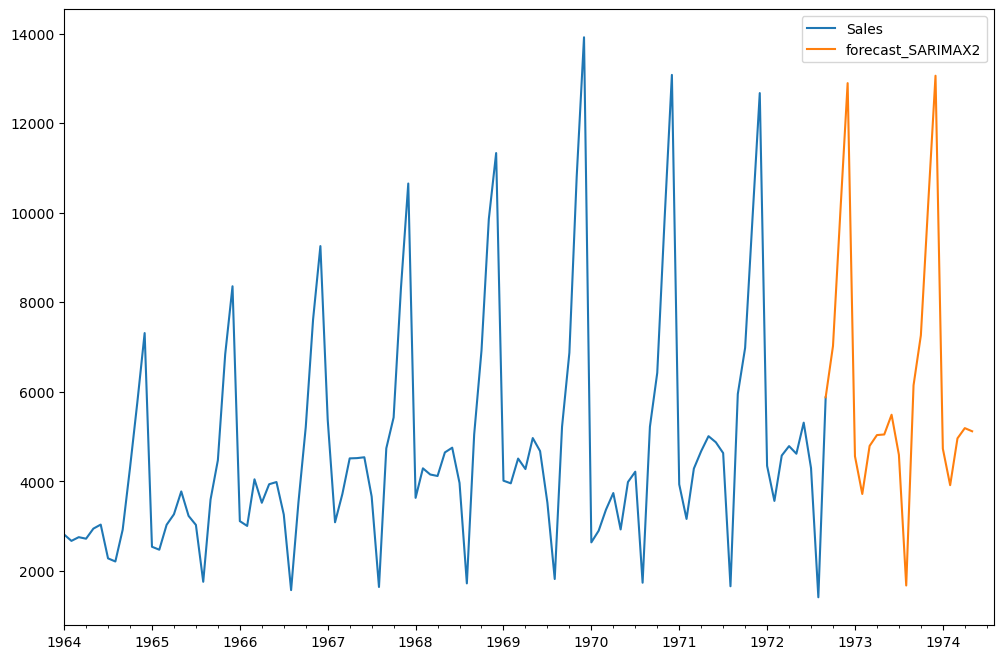

In [167]:
future_df[['Sales','forecast_SARIMAX2']].plot(figsize=(12,8))